In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import make_circles

# Set random seed
tf.random.set_seed(42)

samples = 1000
X, y = make_circles(samples,
                    noise = 0.03,
                    random_state = 42)

print('X : ', X)
print('\n')
print('y : ', y)

X :  [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]


y :  [1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1

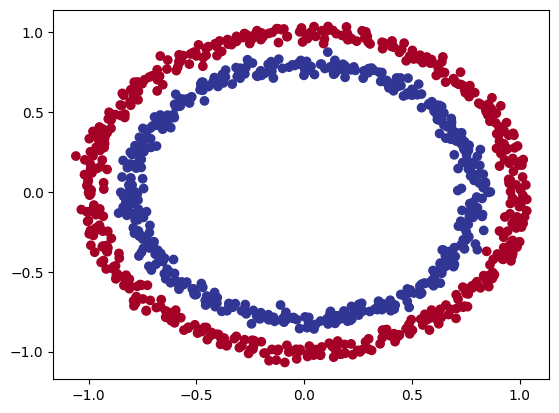

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create the model
model_1 = models.Sequential([
  layers.Dense(1, activation='softmax')
])

# Compile the model
model_1.compile(loss='BinaryCrossentropy',
                optimizer='SGD',
                metrics=['accuracy'])

# Fit the model
model_1.fit(X_train, y_train, epochs=5)

# Evaluate the model
model_1.evaluate(X, y)

test_loss, test_acc = model_1.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4975 - loss: 0.7406  
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4975 - loss: 0.7384 
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4975 - loss: 0.7362 
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4975 - loss: 0.7342  
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4975 - loss: 0.7322 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 0.7445  


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4907 - loss: 0.6883 
Test Accuracy: 0.50


In [20]:
model_2 = tf.keras.Sequential([
  layers.Dense(10, activation='relu'),
  layers.Dense(10, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='BinaryCrossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit the model
model_2.fit(X_train, y_train, epochs=100)

# Evaluate the model
model_2.evaluate(X_train, y_train)

test_loss, test_acc = model_2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4975 - loss: 0.7184   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4975 - loss: 0.7094 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4844 - loss: 0.7044 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4506 - loss: 0.7013 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4536 - loss: 0.6993 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4324 - loss: 0.6977 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4506 - loss: 0.6965
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4643 - loss: 0.6953 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4533 - loss: 0.6942 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4607 - loss: 0.6932 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4882 - loss: 0.6922 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
doing binary classifcation...


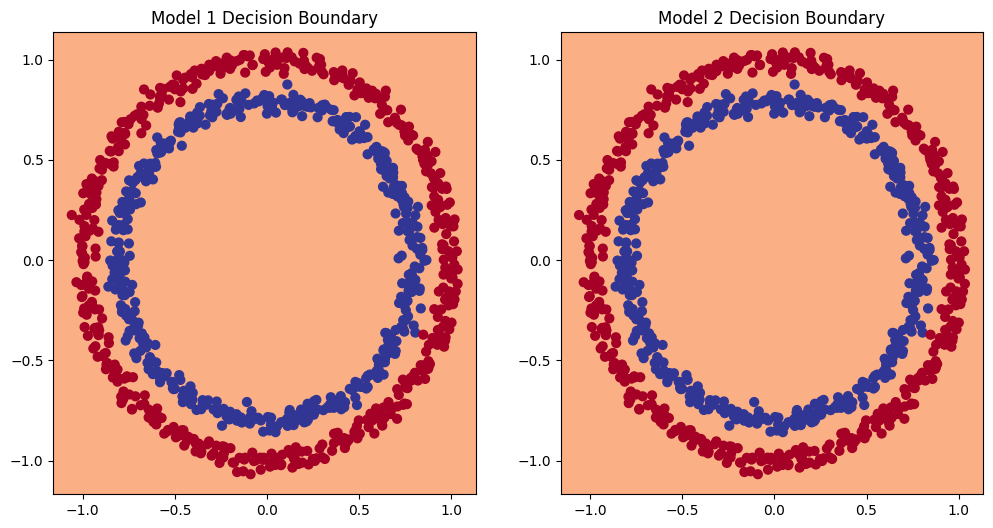

In [7]:
import numpy as np

def plot_decision_boundary(model, X, y):

 # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))

  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_1, X, y)
plt.title("Model 1 Decision Boundary")

plt.subplot(1, 2, 2)
plot_decision_boundary(model_2, X, y)
plt.title("Model 2 Decision Boundary")

plt.show()

Epoch 1/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4878 - loss: 1.1016
Epoch 2/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5099 - loss: 0.9647
Epoch 3/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5313 - loss: 0.8779 
Epoch 4/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5487 - loss: 0.8170 
Epoch 5/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5358 - loss: 0.7797 
Epoch 6/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5637 - loss: 0.7513 
Epoch 7/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5965 - loss: 0.7308 
Epoch 8/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6447 - loss: 0.7137 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 0.7030  
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5857 - loss: 0.7030 
Test Accuracy : 0.59
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
doing binary classifcation...


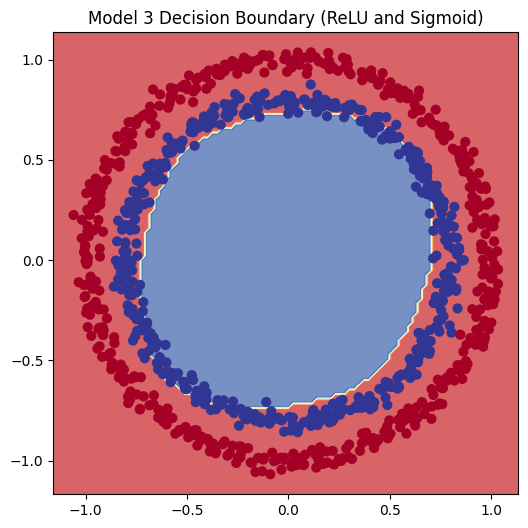

In [13]:
# Model with ReLU and Sigmoid
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid') # Use sigmoid for binary classification
])

model_3.compile(loss='BinaryCrossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit the model
model_3.fit(X, y, epochs=8) # Increased epochs for better convergence

# Evaluate the model
model_3.evaluate(X, y)

test_loss, test_acc = model_3.evaluate(X, y)
print(f"Test Accuracy : {test_acc:.2f}")

# Plot decision boundary for model_3
plt.figure(figsize=(6, 6))
plot_decision_boundary(model_3, X, y)
plt.title("Model 3 Decision Boundary (ReLU and Sigmoid)")
plt.show()

Epoch 1/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6646 - loss: 0.6970
Epoch 2/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.6929 
Epoch 3/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6928 - loss: 0.6828 
Epoch 4/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7590 - loss: 0.6677 
Epoch 5/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7212 - loss: 0.6672 
Epoch 6/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7508 - loss: 0.6617 
Epoch 7/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7454 - loss: 0.6522 
Epoch 8/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8149 - loss: 0.6324 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9693 - loss: 0.6357 
Test Accuracy (Model 3 - ReLU and Sigmoid) on Test Set: 0.97
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
doing binary classifcation...


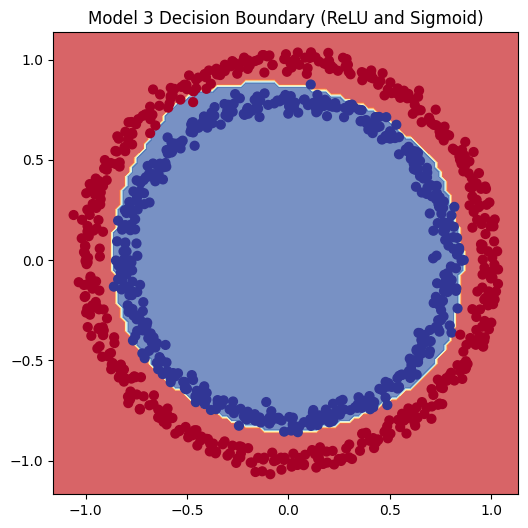

In [9]:


# Train the improved model (model_3) on the training set
model_3.fit(X_train, y_train, epochs=8)

# Evaluate model performance on the test set
test_loss, test_acc = model_3.evaluate(X_test, y_test)
print(f"Test Accuracy (Model 3 - ReLU and Sigmoid) on Test Set: {test_acc:.2f}")

# Plot decision boundary for model_3 (using the entire dataset for visualization)
plt.figure(figsize=(6, 6))
plot_decision_boundary(model_3, X, y)
plt.title("Model 3 Decision Boundary (ReLU and Sigmoid)")
plt.show()

In [10]:
test_loss, test_acc = model_3.evaluate(X_test, y_test)
print(f"Test Loss (Model 3): {test_loss:.2f}")
print(f"Test Accuracy (Model 3) on Test Set: {test_acc:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9693 - loss: 0.6357 
Test Loss (Model 3): 0.64
Test Accuracy (Model 3) on Test Set: 0.97


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
doing binary classifcation...


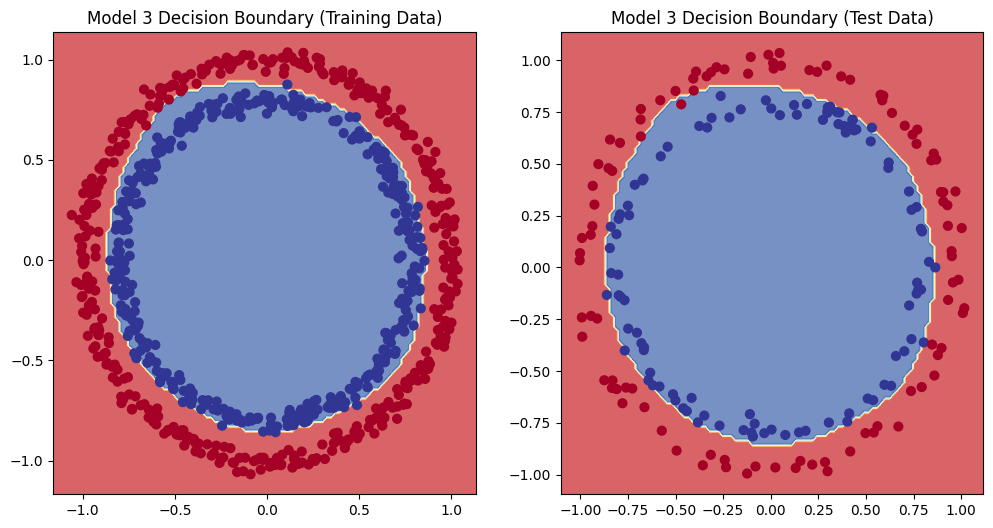

In [11]:
# Plot decision boundary for model_3 on training and test sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_decision_boundary(model_3, X_train, y_train)
plt.title("Model 3 Decision Boundary (Training Data)")

plt.subplot(1, 2, 2)
plot_decision_boundary(model_3, X_test, y_test)
plt.title("Model 3 Decision Boundary (Test Data)")

plt.show()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7905 - loss: 0.6252 - val_accuracy: 0.9800 - val_loss: 0.6270
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7988 - loss: 0.6237 - val_accuracy: 0.9850 - val_loss: 0.6168
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8225 - loss: 0.6026 - val_accuracy: 0.9850 - val_loss: 0.6064
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8276 - loss: 0.5898 - val_accuracy: 1.0000 - val_loss: 0.5891
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8103 - loss: 0.6012 - val_accuracy: 0.9850 - val_loss: 0.5809
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8460 - loss: 0.5821 - val_accuracy: 0.9850 - val_loss: 0.5675
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8408 - loss: 0.5710 - val_accuracy: 0.9900 - val_loss: 0.5512
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8059 - loss: 0.5728 - val_accuracy: 0.9800 - val_loss:

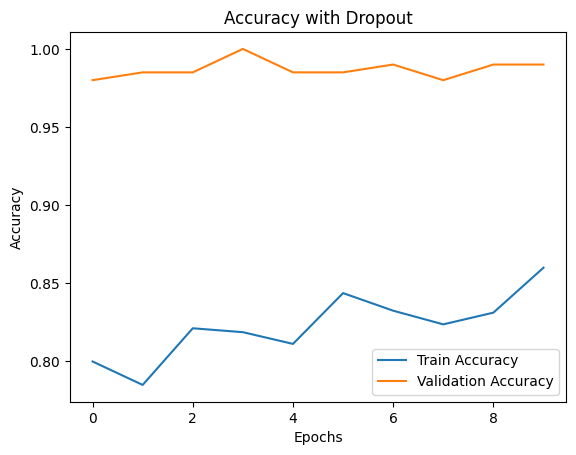

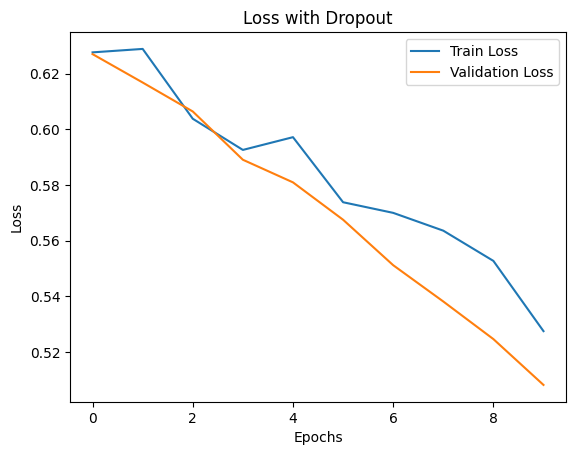

In [12]:
history = model_3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy with Dropout')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss with Dropout')
plt.legend()
plt.show()